In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from dtsim import DTSimRegressor, DTSimClassifier

## Regression Dataset

In [2]:
from sklearn.datasets import fetch_california_housing

cal_housing = fetch_california_housing()
train_x, test_x, train_y, test_y = train_test_split(cal_housing.data, cal_housing.target, test_size=0.2, random_state=0)

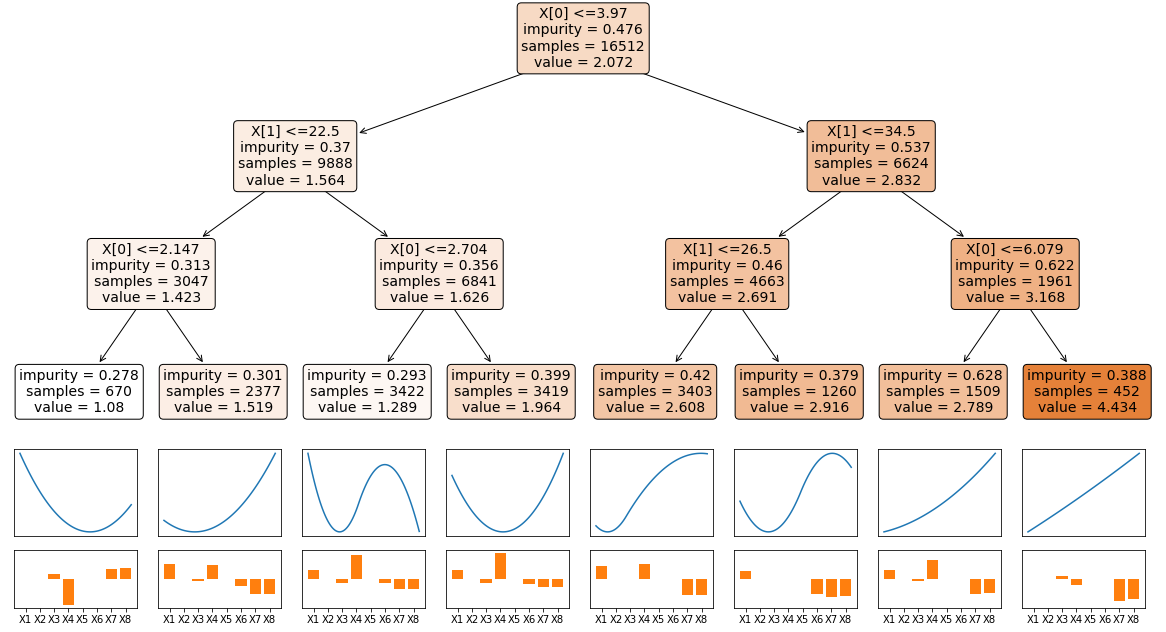

(0.6180644515974657, 0.6303170279280196)

In [3]:
clf = DTSimRegressor(max_depth=3, split_features=[0, 1], min_samples_leaf=100, split_method="sim", base_method="sim",
                     reg_lambda=[0, 0.05, 0.1], reg_gamma=[0.1, 1, 10])
clf.fit(train_x, train_y)
clf.plot_tree()
pred_train = clf.predict(train_x).reshape([-1, 1])
pred_test = clf.predict(test_x).reshape([-1, 1])
np.mean((train_y - pred_train.ravel()) ** 2) ** 0.5, np.mean((test_y - pred_test.ravel()) ** 2) ** 0.5

In [4]:
from dtsim.dtsimv2 import DTSimRegressorV2
clf = DTSimRegressorV2(max_depth=1, min_samples_leaf=100, split_method="sim", base_method="sim",
                     reg_lambda=[0, 0.05, 0.1], reg_gamma=[0.1, 1, 10])
clf.fit(train_x, train_y)
pred_train = clf.predict(train_x).reshape([-1, 1])
pred_test = clf.predict(test_x).reshape([-1, 1])
np.mean((train_y - pred_train.ravel()) ** 2) ** 0.5, np.mean((test_y - pred_test.ravel()) ** 2) ** 0.5

(0.671693563087876, 0.6762865117132647)

## Classification Dataset

In [20]:
from sklearn.datasets import fetch_openml
magic = fetch_openml("MagicTelescope")
train_x, test_x, train_y, test_y = train_test_split(magic.data, magic.target, test_size=0.2, random_state=0)

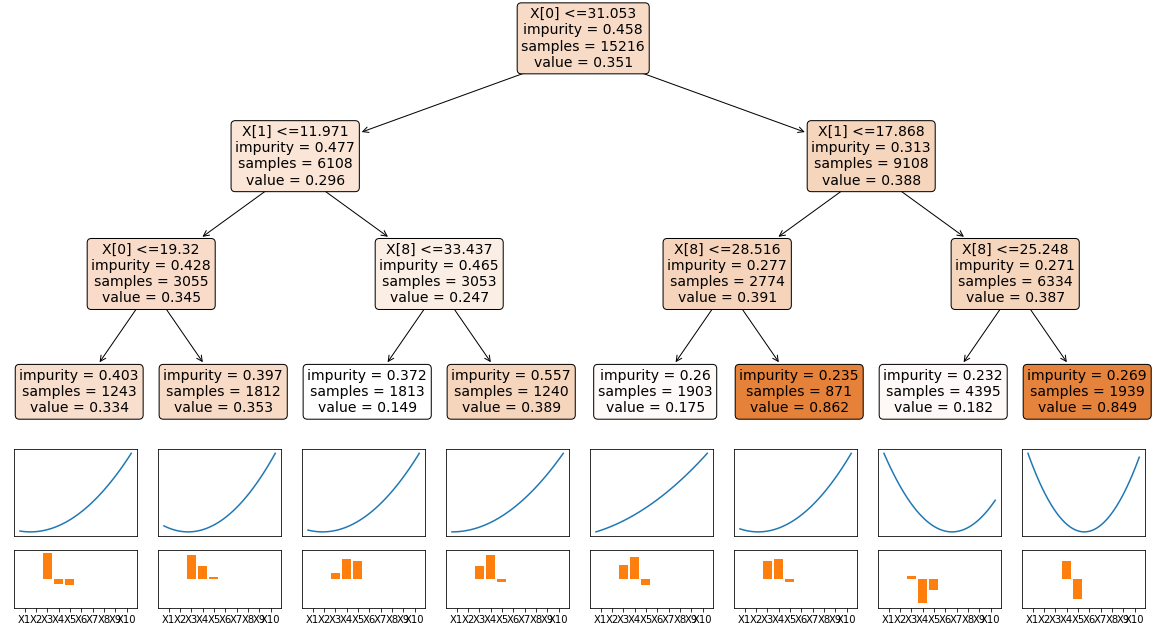

(0.9214957612356288, 0.9149138002144684)

In [21]:
clf = DTSimClassifier(max_depth=3, split_features=None, min_samples_leaf=100, split_method="sim", base_method="sim",
                     reg_lambda=[0, 0.05, 0.1], reg_gamma=[0.1, 1, 10])
clf.fit(train_x, train_y)
clf.plot_tree()
pred_train = clf.predict_proba(train_x).reshape([-1, 1])
pred_test = clf.predict_proba(test_x).reshape([-1, 1])
roc_auc_score(train_y, pred_train.ravel()), roc_auc_score(test_y, pred_test.ravel())

In [22]:
from dtsim.dtsimv2 import DTSimClassifierV2
clf = DTSimClassifierV2(max_depth=3, min_samples_leaf=100, split_method="sim", base_method="sim",
                     reg_lambda=[0, 0.05, 0.1], reg_gamma=[0.1, 1, 10])
clf.fit(train_x, train_y)
pred_train = clf.predict_proba(train_x).reshape([-1, 1])
pred_test = clf.predict_proba(test_x).reshape([-1, 1])
roc_auc_score(train_y, pred_train.ravel()), roc_auc_score(test_y, pred_test.ravel())

(0.887205344848426, 0.8748248644313974)